In [152]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae1 import *
from KDEs import *
from toolbox import *
import warnings
import itertools
import os

warnings.filterwarnings("ignore")

data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

u = ecdf_brr(data.return_brr)
v = ecdf_btc(data.return_btc)

brr = np.array(data.return_brr)
btc = np.array(data.return_btc)

kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

kde_brr = KDE(data.return_brr, "Gaussian", kde_brr.h_brot*3)
kde_btc = KDE(data.return_btc, "Gaussian", kde_btc.h_brot*3)

In [3]:
# Gaussian, t_Copula, Clayton, Frank, Gumbel, Plackett, Gaussian mix Indep
C1  = Gaussian(dict(rho=0.9),       Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!
C2  = t_Copula(dict(rho=0.1, nu=4), Law_RS=kde_brr, Law_RF=kde_btc, nu_lowerbound=2) 
C2c = t_Copula(dict(rho=0.1, nu=4), Law_RS=kde_brr, Law_RF=kde_btc, nu_lowerbound=4) 
C3  = Clayton(dict(theta=0.1),      Law_RS=kde_brr, Law_RF=kde_btc)
C4  = Frank(dict(theta=0.1),        Law_RS=kde_brr, Law_RF=kde_btc)
C5  = Gumbel(dict(theta=3),         Law_RS=kde_brr, Law_RF=kde_btc)
C6  = Plackett(dict(theta=10),      Law_RS=kde_brr, Law_RF=kde_btc)
C7  = Gaussian_Mix_Independent(dict(rho=.9,p=0.7),Law_RS=kde_brr, Law_RF=kde_btc)
Copulae_names = ['Gaussian', 't_Copula', 't_Copula_Capped', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']
Copulae_arr   = [C1,C2,C2c,C3,C4,C5,C6,C7]
Copulae = dict(zip(Copulae_names, Copulae_arr))

6.csv
Optimization terminated successfully.
         Current function value: -0.425856
         Iterations: 30
         Function evaluations: 64
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.470180
         Iterations: 79
         Function evaluations: 164
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.468192
         Iterations: 133
         Function evaluations: 254
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: -0.407092
         Iterations: 32
         Function evaluations: 70
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.419158
         Iterations: 34
         Function evaluations: 75
Frank is done.

Optimization terminated successfully.
         Current function value: -0.406259
         Iterations: 32
         Function evaluations: 70
Gumbel is done.

Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: -0.530747
         Iterations: 68
         Function evaluations: 138
Gauss Mix Indep is done.

2.csv
Optimization terminated successfully.
         Current function value: -0.480643
         Iterations: 31
         Function evaluations: 66
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.566133
         Iterations: 71
         Function evaluations: 155
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.556868
         Iterations: 187
         Function evaluations: 365
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: -0.490884
         Iterations: 32
         Function evaluations: 67
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.476873
         Iterations: 33
         Function evaluations: 72
Frank is done.

Optimization terminated successf

Optimization terminated successfully.
         Current function value: -0.583976
         Iterations: 69
         Function evaluations: 139
Gauss Mix Indep is done.

16.csv
Optimization terminated successfully.
         Current function value: -0.368478
         Iterations: 30
         Function evaluations: 65
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.488943
         Iterations: 164
         Function evaluations: 319
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.459549
         Iterations: 136
         Function evaluations: 260
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: -0.291008
         Iterations: 33
         Function evaluations: 72
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.370948
         Iterations: 34
         Function evaluations: 77
Frank is done.

Optimization terminated succes

Optimization terminated successfully.
         Current function value: -0.428357
         Iterations: 65
         Function evaluations: 135
Gauss Mix Indep is done.

12.csv
Optimization terminated successfully.
         Current function value: -0.376550
         Iterations: 30
         Function evaluations: 64
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.466319
         Iterations: 83
         Function evaluations: 165
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.450987
         Iterations: 125
         Function evaluations: 233
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: -0.319773
         Iterations: 32
         Function evaluations: 69
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.394714
         Iterations: 34
         Function evaluations: 75
Frank is done.

Optimization terminated success

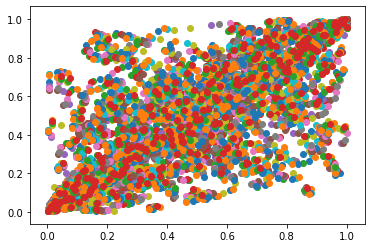

In [12]:
results = []
ls = os.listdir('../processed_data/future_brr_v3/train/')
ls = [l for l in ls if l.endswith('.csv')]
for file in ls:
    print(file)
    train = pd.read_csv('../processed_data/future_brr_v3/train/'+file)
    btc = train.loc[:,'log return future']
    brr = train.loc[:,'log return brr']
    u = ECDF(brr)(brr)
    v = ECDF(btc)(btc)
    plt.scatter(u,v)
    paras = []
    likelihood = []
    for C_name in Copulae:
        Copulae[C_name].canonical_calibrate(u,v)
        print(C_name,'is done.\n')
    
    for C_name in Copulae:
        paras.append((C_name,Copulae[C_name].paras))
        
    for C_name in Copulae:
        ln = Copulae[C_name].dependency_likelihood(u,v)
        likelihood.append((C_name,ln))
        
    results.append([paras, likelihood])

In [13]:
c_arr = []
date_range_arr = []
for i, file in enumerate(ls):
    train = pd.read_csv('../processed_data/future_brr_v3/train/'+file)
    a = pd.DataFrame(results[i][0])
    a.columns = ['Copula_name', 'paras']
    a.index = a.iloc[:,0]
    b = pd.DataFrame(results[i][1])
    b.index = b.iloc[:,0]
    c = pd.concat([a.iloc[:,1],b.iloc[:,1]],axis=1)
    c.columns = ['paras', 'likelihood']
    date_range = train.Date.iloc[-1] +' to ' + train.Date.iloc[0]
    date_range_arr.append(date_range)
    print(date_range)
    c_arr.append(c)

2019-08-01 to 2020-07-31
2019-07-01 to 2020-06-30
2019-09-03 to 2020-08-31
2019-10-01 to 2020-09-30
2020-02-03 to 2021-01-29
2020-01-02 to 2020-12-31
2019-11-01 to 2020-10-30
2019-12-02 to 2020-11-30
2018-03-01 to 2019-02-28
2018-04-02 to 2019-03-29
2018-06-01 to 2019-05-31
2018-05-01 to 2019-04-30
2018-07-02 to 2019-06-28
2018-08-01 to 2019-07-31
2018-10-01 to 2019-09-30
2018-09-04 to 2019-08-30
2018-11-01 to 2019-10-31
2018-12-03 to 2019-11-29
2019-04-01 to 2020-03-31
2019-03-01 to 2020-02-28
2019-01-02 to 2019-12-31
2019-02-01 to 2020-01-31
2019-05-01 to 2020-04-30
2019-06-03 to 2020-05-29


In [14]:
result = pd.concat(dict(zip(date_range_arr, c_arr)), axis=1)

In [15]:
result.iloc[:,[i for i in range(len(result.columns)) if i%2!=0]].style.highlight_max(color = 'lightgreen', axis = 0)

,2018-03-01 to 2019-02-28,2018-04-02 to 2019-03-29,2018-05-01 to 2019-04-30,2018-06-01 to 2019-05-31,2018-07-02 to 2019-06-28,2018-08-01 to 2019-07-31,2018-09-04 to 2019-08-30,2018-10-01 to 2019-09-30,2018-11-01 to 2019-10-31,2018-12-03 to 2019-11-29,2019-01-02 to 2019-12-31,2019-02-01 to 2020-01-31,2019-03-01 to 2020-02-28,2019-04-01 to 2020-03-31,2019-05-01 to 2020-04-30,2019-06-03 to 2020-05-29,2019-07-01 to 2020-06-30,2019-08-01 to 2020-07-31,2019-09-03 to 2020-08-31,2019-10-01 to 2020-09-30,2019-11-01 to 2020-10-30,2019-12-02 to 2020-11-30,2020-01-02 to 2020-12-31,2020-02-03 to 2021-01-29
,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood
Gaussian,0.417644,0.437603,0.400458,0.404937,0.472737,0.408929,0.41509,0.387387,0.379347,0.390892,0.368464,0.39435,0.402113,0.424306,0.437106,0.447862,0.390134,0.439427,0.449524,0.472591,0.461932,0.505978,0.567122,0.595498
t_Copula,0.486086,0.545291,0.494622,0.563125,0.630331,0.563859,0.56156,0.514475,0.457691,0.450771,0.431778,0.469227,0.468582,0.493562,0.504535,0.496285,0.43051,0.469239,0.487089,0.520827,0.53714,0.578727,0.630528,0.64092
t_Copula_Capped,0.474791,0.518299,0.471751,0.516681,0.591206,0.525485,0.526285,0.483399,0.443712,0.444434,0.423845,0.459846,0.462202,0.485837,0.497926,0.494886,0.430021,0.469886,0.48705,0.519491,0.534773,0.574015,0.627257,0.639535
Clayton,0.382844,0.419533,0.383191,0.386078,0.415659,0.346618,0.343353,0.291003,0.292403,0.299549,0.289202,0.319768,0.333954,0.379551,0.389701,0.409901,0.370786,0.407086,0.421347,0.478879,0.466942,0.490877,0.496287,0.556025
Frank,0.375954,0.392168,0.354631,0.364442,0.434911,0.390772,0.397239,0.370927,0.367165,0.37525,0.34837,0.394698,0.402122,0.40846,0.422129,0.436669,0.385072,0.419142,0.429722,0.449584,0.453387,0.47685,0.519399,0.53283
Gumbel,0.423546,0.456559,0.40951,0.460599,0.547069,0.485797,0.491167,0.469016,0.417641,0.42043,0.396657,0.421819,0.419431,0.429469,0.441533,0.429851,0.362979,0.406259,0.420707,0.435005,0.454228,0.496828,0.572085,0.565119
Plackett,0.436202,0.477379,0.438812,0.472929,0.552926,0.509672,0.512306,0.471949,0.446105,0.440398,0.410647,0.467551,0.467222,0.474608,0.48511,0.486122,0.426397,0.453257,0.468415,0.494599,0.501544,0.538392,0.581063,0.592233
Gauss Mix Indep,0.473289,0.538427,0.497786,0.577929,0.631645,0.583976,0.576269,0.533633,0.469019,0.45044,0.428357,0.47495,0.470476,0.491273,0.499361,0.491632,0.427504,0.460797,0.478617,0.511848,0.530747,0.572193,0.6212,0.629458


In [16]:
result.iloc[:,[i for i in range(len(result.columns)) if i%2==0]]

,2018-03-01 to 2019-02-28,2018-04-02 to 2019-03-29,2018-05-01 to 2019-04-30,2018-06-01 to 2019-05-31,2018-07-02 to 2019-06-28,2018-08-01 to 2019-07-31,2018-09-04 to 2019-08-30,2018-10-01 to 2019-09-30,2018-11-01 to 2019-10-31,2018-12-03 to 2019-11-29,...,2019-05-01 to 2020-04-30,2019-06-03 to 2020-05-29,2019-07-01 to 2020-06-30,2019-08-01 to 2020-07-31,2019-09-03 to 2020-08-31,2019-10-01 to 2020-09-30,2019-11-01 to 2020-10-30,2019-12-02 to 2020-11-30,2020-01-02 to 2020-12-31,2020-02-03 to 2021-01-29
,paras,paras,paras,paras,paras,paras,paras,paras,paras,paras,...,paras,paras,paras,paras,paras,paras,paras,paras,paras,paras
Gaussian,{'rho': 0.7491536733958863},{'rho': 0.7605905668625701},{'rho': 0.7386496966349712},{'rho': 0.7415624970184227},{'rho': 0.7792556251681406},{'rho': 0.7440029217262243},{'rho': 0.7476807394558829},{'rho': 0.7305998486145793},{'rho': 0.7302611121891227},{'rho': 0.7375031355318662},...,{'rho': 0.7652480089086083},{'rho': 0.7709344702971147},{'rho': 0.7378283585603527},{'rho': 0.7673616454230623},{'rho': 0.7719732037855911},{'rho': 0.7830018886962049},{'rho': 0.801250961535064},{'rho': 0.7967557850927987},{'rho': 0.8232489292559226},{'rho': 0.8342232390687089}
t_Copula,"{'rho': 0.7514883643247671, 'nu': 2.0757151087...","{'rho': 0.784535184221187, 'nu': 2.00000000000...","{'rho': 0.7657016044013689, 'nu': 2.0000000000...","{'rho': 0.7980380022370263, 'nu': 2.0000000000...","{'rho': 0.8245617392404675, 'nu': 2.0000000000...","{'rho': 0.8013798506527081, 'nu': 2.0000000000...","{'rho': 0.800367579216985, 'nu': 2.00000000000...","{'rho': 0.7797970238130068, 'nu': 2.0000000000...","{'rho': 0.7603492002561357, 'nu': 2.0000000000...","{'rho': 0.7520854421454537, 'nu': 2.0000000000...",...,"{'rho': 0.7803898323781535, 'nu': 2.0796162897...","{'rho': 0.7854497368945841, 'nu': 2.6034998479...","{'rho': 0.7554444283225266, 'nu': 2.6243234537...","{'rho': 0.7749880267061623, 'nu': 2.9073463770...","{'rho': 0.7815257580659896, 'nu': 2.7065472607...","{'rho': 0.7924781815278217, 'nu': 2.4834084144...","{'rho': 0.8008265943326744, 'nu': 2.5883364576...","{'rho': 0.8091855052064834, 'nu': 2.2116497150...","{'rho': 0.826599300008208, 'nu': 2.26187086597...","{'rho': 0.8311181143829119, 'nu': 2.3196289239..."
t_Copula_Capped,"{'rho': 0.7746109992871317, 'nu': 4.0000000000...","{'rho': 0.8006634028681634, 'nu': 4.0000000000...","{'rho': 0.7816341708108789, 'nu': 4.0000000000...","{'rho': 0.8006634028681634, 'nu': 4.0000000000...","{'rho': 0.8364835966862315, 'nu': 4.0000000000...","{'rho': 0.812153484764182, 'nu': 4.00000000000...","{'rho': 0.8114791272852444, 'nu': 4.0000000000...","{'rho': 0.7904798886702264, 'nu': 4.0000000000...","{'rho': 0.7709051709209822, 'nu': 4.0000000000...","{'rho': 0.7709051709209822, 'nu': 4.0000000000...",...,"{'rho': 0.8006110701838747, 'nu': 4.0000000000...","{'rho': 0.8006110701838747, 'nu': 4.0000000000...","{'rho': 0.7670892445727844, 'nu': 4.0000000000...","{'rho': 0.7839437226363537, 'nu': 4.0000000000...","{'rho': 0.7927614882063322, 'nu': 4.0000000000...","{'rho': 0.8067808255342495, 'nu': 4.0000000000...","{'rho': 0.8143805295241723, 'nu': 4.0000000000...","{'rho': 0.8275146357489276, 'nu': 4.0000000000...","{'rho': 0.847119866810962, 'nu': 4.00000000000...","{'rho': 0.847119866810962, 'nu': 4.00000000000..."
Clayton,{'theta': 1.9231864638201963},{'theta': 2.1329901321427904},{'theta': 1.9620193797024466},{'theta': 1.9949172425822066},{'theta': 2.106709142769706},{'theta': 1.7958722854943854},{'theta': 1.7780990389085438},{'theta': 1.5413780549462286},{'theta': 1.5359321263739831},{'theta': 1.5483426727541711},...,{'theta': 1.939058698580548},{'theta': 2.026185539321828},{'theta': 1.8740232863480217},{'theta': 2.009227464094283},{'theta': 2.0603627170803236},{'theta': 2.309831199899873},{'theta': 2.249326078185507},{'theta': 2.3703123608094985},{'theta': 2.3934058274022196},{'theta': 2.6718026589536565}
Frank,{'theta': 6.6411182572364496},{'theta': 6.926624437437955},{'theta': 6.45

In [17]:
result.iloc[[0,2,3,4,5,6,7],[i for i in range(len(result.columns)) if i%2!=0]].style.highlight_max(color = 'lightgreen', axis = 0)

,2018-03-01 to 2019-02-28,2018-04-02 to 2019-03-29,2018-05-01 to 2019-04-30,2018-06-01 to 2019-05-31,2018-07-02 to 2019-06-28,2018-08-01 to 2019-07-31,2018-09-04 to 2019-08-30,2018-10-01 to 2019-09-30,2018-11-01 to 2019-10-31,2018-12-03 to 2019-11-29,2019-01-02 to 2019-12-31,2019-02-01 to 2020-01-31,2019-03-01 to 2020-02-28,2019-04-01 to 2020-03-31,2019-05-01 to 2020-04-30,2019-06-03 to 2020-05-29,2019-07-01 to 2020-06-30,2019-08-01 to 2020-07-31,2019-09-03 to 2020-08-31,2019-10-01 to 2020-09-30,2019-11-01 to 2020-10-30,2019-12-02 to 2020-11-30,2020-01-02 to 2020-12-31,2020-02-03 to 2021-01-29
,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood
Gaussian,0.417644,0.437603,0.400458,0.404937,0.472737,0.408929,0.41509,0.387387,0.379347,0.390892,0.368464,0.39435,0.402113,0.424306,0.437106,0.447862,0.390134,0.439427,0.449524,0.472591,0.461932,0.505978,0.567122,0.595498
t_Copula_Capped,0.474791,0.518299,0.471751,0.516681,0.591206,0.525485,0.526285,0.483399,0.443712,0.444434,0.423845,0.459846,0.462202,0.485837,0.497926,0.494886,0.430021,0.469886,0.48705,0.519491,0.534773,0.574015,0.627257,0.639535
Clayton,0.382844,0.419533,0.383191,0.386078,0.415659,0.346618,0.343353,0.291003,0.292403,0.299549,0.289202,0.319768,0.333954,0.379551,0.389701,0.409901,0.370786,0.407086,0.421347,0.478879,0.466942,0.490877,0.496287,0.556025
Frank,0.375954,0.392168,0.354631,0.364442,0.434911,0.390772,0.397239,0.370927,0.367165,0.37525,0.34837,0.394698,0.402122,0.40846,0.422129,0.436669,0.385072,0.419142,0.429722,0.449584,0.453387,0.47685,0.519399,0.53283
Gumbel,0.423546,0.456559,0.40951,0.460599,0.547069,0.485797,0.491167,0.469016,0.417641,0.42043,0.396657,0.421819,0.419431,0.429469,0.441533,0.429851,0.362979,0.406259,0.420707,0.435005,0.454228,0.496828,0.572085,0.565119
Plackett,0.436202,0.477379,0.438812,0.472929,0.552926,0.509672,0.512306,0.471949,0.446105,0.440398,0.410647,0.467551,0.467222,0.474608,0.48511,0.486122,0.426397,0.453257,0.468415,0.494599,0.501544,0.538392,0.581063,0.592233
Gauss Mix Indep,0.473289,0.538427,0.497786,0.577929,0.631645,0.583976,0.576269,0.533633,0.469019,0.45044,0.428357,0.47495,0.470476,0.491273,0.499361,0.491632,0.427504,0.460797,0.478617,0.511848,0.530747,0.572193,0.6212,0.629458


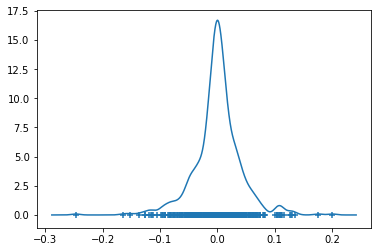

In [153]:
kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")
# kde_brr = KDE(data.return_brr, "Gaussian", kde_brr.h_brot*3)
# kde_btc = KDE(data.return_brr, "Gaussian", kde_btc.h_brot*3)
kde_brr.plot_density()

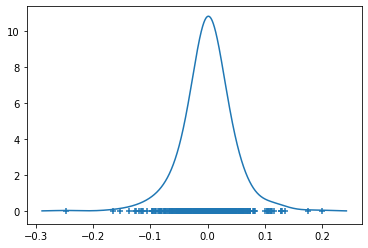

In [19]:
kde_brr.plot_density()

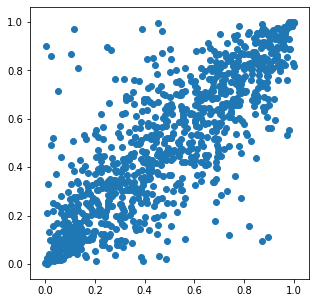

In [169]:
s = Gaussian_Mix_Independent({'rho':.9,'p':0.9}, stats.uniform, stats.uniform).sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0],s[:,1])

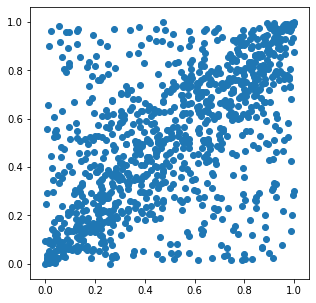

In [171]:
s = Gaussian_Mix_Independent({'rho':.9,'p':0.6}, stats.uniform, stats.uniform).sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0],s[:,1])

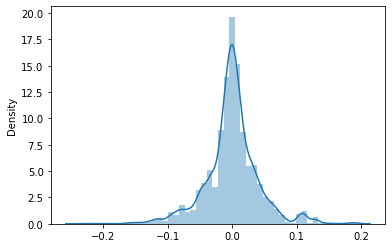

In [162]:
u = s[:,0]
sns.distplot(np.quantile(data.return_brr, u))

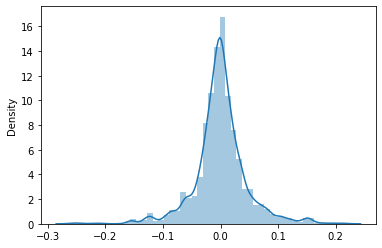

In [164]:
v = s[:,1]
sns.distplot(np.quantile(data.return_btc, v))

Text(0, 0.5, '$R^F$')

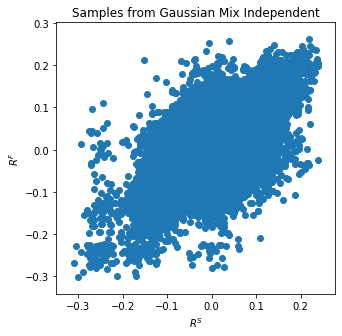

In [20]:
s = Gaussian_Mix_Independent(C7.paras, kde_brr, kde_btc).sample(100000)
# Check with using empirical marginal (not KDE)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0],s[:,1])
plt.title("Samples from Gaussian Mix Independent")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")

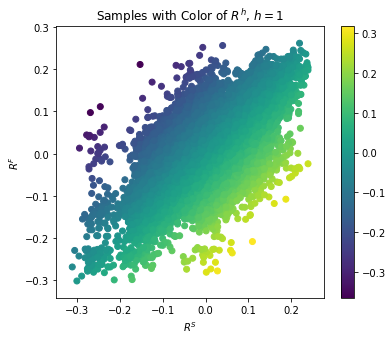

In [21]:
h=1
rh = s[:,0] - h*s[:,1]
plt.figure(figsize=(6,5))
plt.scatter(s[:,0],s[:,1],c=rh)
plt.title(r"Samples with Color of $R^h$, $h=1$")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")
plt.colorbar()

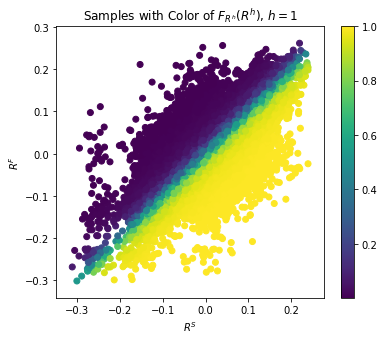

In [22]:
h=1
rh = s[:,0] - h*s[:,1]
plt.figure(figsize=(6,5))
plt.scatter(s[:,0],s[:,1],c=ECDF(rh)(rh))
plt.title(r"Samples with Color of $F_{R^h}(R^h)$, $h=1$")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")
plt.colorbar()

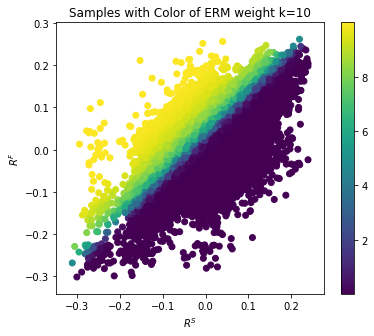

In [23]:
h=1
rh = s[:,0] - h*s[:,1]
plt.figure(figsize=(6,5))
plt.scatter(s[:,0],s[:,1],c=ERM_weight(10,ECDF(rh)(rh)))
plt.title(r"Samples with Color of ERM weight k=10")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")
plt.colorbar()

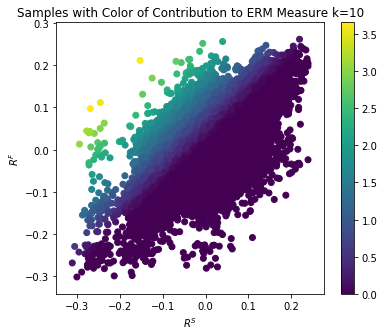

In [24]:
h=1
rh = s[:,0] - h*s[:,1]
plt.figure(figsize=(6,5))
plt.scatter(s[:,0],s[:,1],c=-ERM_weight(10,ECDF(rh)(rh))*rh)
plt.title(r"Samples with Color of Contribution to ERM Measure k=10")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")
plt.colorbar()

In [27]:
def ERM_estimate_trapezoidal(k, rh):
    rh = np.sort(rh)
    s  = ECDF(rh)(rh)
    d  = s[1:] - s[:-1] 
    toint = ERM_weight(k,s)*rh
    return -np.sum((toint[:-1] + toint[1:])*d)/2

def ES(q, rh):
    b = np.quantile(rh,q)
    return -np.mean(rh[rh<=q])

def wrapper(rs, rf, h, risk_measure):
    rh = rs - h*rf
    return risk_measure(rh)

def optimize_h(C, k_arr, q_arr):
    sample = C.sample(1000000)
    rs = sample[:,0]
    rf = sample[:,1]
    best_h = []
    
    for k in k_arr:
        fn = lambda h: wrapper(rs,rf,h,partial(ERM_estimate_trapezoidal,k))
        best_h.append(scipy.optimize.fmin(fn,1)[0])
        
    for q in q_arr:
        fn = lambda h: wrapper(rs,rf,h,partial(ES,q))
        best_h.append(scipy.optimize.fmin(fn,1)[0])
    return best_h

In [29]:
optimize_h(C1, k_arr=[10, 20], q_arr=[0.1,0.05])

Optimization terminated successfully.
         Current function value: 0.046767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.060275
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000329
         Iterations: 14
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.003134
         Iterations: 15
         Function evaluations: 31


[0.7533203124999999,
 0.7877929687499998,
 0.7532226562499998,
 0.7064453124999996]

In [134]:
copula_paras = dict(zip(date_range_arr, c_arr))
best_h_result = []
for file in ls:
    print(file)
    train = pd.read_csv('../processed_data/future_brr_v3/train/'+file)
    date_range = train.Date.iloc[-1] +' to ' + train.Date.iloc[0]
    btc = train.loc[:,'log return future']
    brr = train.loc[:,'log return brr']
    kde_btc = KDE(btc, "Gaussian")
    kde_brr = KDE(brr, "Gaussian")
    paras_touse = result.loc[:,date_range].paras
# Gaussian, t_Copula, Clayton, Frank, Gumbel, Plackett, Gaussian mix Indep
    C1  = Gaussian(paras_touse[0], Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!
    C2  = t_Copula(paras_touse[1], Law_RS=kde_brr, Law_RF=kde_btc, nu_lowerbound=2) 
    C2c = t_Copula(paras_touse[2], Law_RS=kde_brr, Law_RF=kde_btc, nu_lowerbound=4) 
    C3  = Clayton(paras_touse[3],  Law_RS=kde_brr, Law_RF=kde_btc)
    C4  = Frank(paras_touse[4],    Law_RS=kde_brr, Law_RF=kde_btc)
    C5  = Gumbel(paras_touse[5],   Law_RS=kde_brr, Law_RF=kde_btc)
    C6  = Plackett(paras_touse[6], Law_RS=kde_brr, Law_RF=kde_btc)
    C7  = Gaussian_Mix_Independent(paras_touse[7], Law_RS=kde_brr, Law_RF=kde_btc)
    Copulae_names = ['Gaussian', 't_Copula', 't_Copula_Capped', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']
    Copulae_arr   = [C1,C2,C2c,C3,C4,C5,C6,C7]
    Copulae = dict(zip(Copulae_names, Copulae_arr))
    best_h = []
    for C_name in Copulae:
        best_h.append( (C_name,optimize_h(Copulae[C_name], k_arr=[10,20], q_arr=[0.01,0.05])))
        print(C_name,'is done.\n')
        
    intermediate_result = pd.concat([pd.DataFrame({bh[0]:bh[1]}).T for bh in best_h])    
    best_h_result.append(intermediate_result)

6.csv
Optimization terminated successfully.
         Current function value: 0.047080
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.064396
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.013740
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.002676
         Iterations: 14
         Function evaluations: 31
Gaussian is done.

Optimization terminated successfully.
         Current function value: 0.044460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.061449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.012001
         Iterations: 15
         Function evaluations: 33
Optimizat

Optimization terminated successfully.
         Current function value: 0.014966
         Iterations: 14
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.004354
         Iterations: 15
         Function evaluations: 30
Plackett is done.

Optimization terminated successfully.
         Current function value: 0.052842
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.073112
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.015121
         Iterations: 15
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.003905
         Iterations: 15
         Function evaluations: 32
Gauss Mix Indep is done.

5.csv
Optimization terminated successfully.
         Current function value: 0.043255
         Iterations: 14
         Function

Optimization terminated successfully.
         Current function value: 0.046129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.011981
         Iterations: 14
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.001321
         Iterations: 15
         Function evaluations: 32
Gumbel is done.

Optimization terminated successfully.
         Current function value: 0.046783
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.067793
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.010720
         Iterations: 15
         Function evaluations: 31
Optimization term

Optimization terminated successfully.
         Current function value: 0.011570
         Iterations: 15
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.001426
         Iterations: 17
         Function evaluations: 34
Clayton is done.

Optimization terminated successfully.
         Current function value: 0.049966
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.074883
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.011509
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000624
         Iterations: 16
         Function evaluations: 37
Frank is done.

Optimization terminated successfully.
         Current function value: 0.043584
         Iterations: 13
         Function evaluations: 26


Optimization terminated successfully.
         Current function value: 0.035817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.050479
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.008439
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: -0.000658
         Iterations: 15
         Function evaluations: 31
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: 0.038805
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.053095
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.010749
         Iterations: 15
         Function evaluations: 31
Optimiz

Optimization terminated successfully.
         Current function value: 0.012053
         Iterations: 15
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: 0.002652
         Iterations: 15
         Function evaluations: 32
Gaussian is done.

Optimization terminated successfully.
         Current function value: 0.037571
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.051111
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.009403
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.002424
         Iterations: 13
         Function evaluations: 29
t_Copula is done.

Optimization terminated successfully.
         Current function value: 0.036473
         Iterations: 13
         Function evaluations:

Optimization terminated successfully.
         Current function value: 0.047146
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.065266
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.010374
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.003677
         Iterations: 15
         Function evaluations: 32
Gauss Mix Indep is done.

21.csv
Optimization terminated successfully.
         Current function value: 0.041215
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.053973
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.012038
         Iterations: 15
         Function evaluations: 30
O

Optimization terminated successfully.
         Current function value: 0.010216
         Iterations: 15
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.000769
         Iterations: 15
         Function evaluations: 31
Gumbel is done.

Optimization terminated successfully.
         Current function value: 0.040562
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.056369
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.009384
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.002330
         Iterations: 15
         Function evaluations: 33
Plackett is done.

Optimization terminated successfully.
         Current function value: 0.043537
         Iterations: 15
         Function evaluations: 3

Optimization terminated successfully.
         Current function value: 0.054118
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.072711
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.015372
         Iterations: 16
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 0.005657
         Iterations: 15
         Function evaluations: 31
Frank is done.

Optimization terminated successfully.
         Current function value: 0.047321
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.063341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.013826
         Iterations: 14
         Function evaluations: 29
Optimization termi

Optimization terminated successfully.
         Current function value: 0.013295
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.003142
         Iterations: 14
         Function evaluations: 31
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: 0.048653
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.061402
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.017116
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.006596
         Iterations: 15
         Function evaluations: 34
Clayton is done.

Optimization terminated successfully.
         Current function value: 0.053741
         Iterations: 15
         Function evalua

Optimization terminated successfully.
         Current function value: 0.047528
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.065446
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.013694
         Iterations: 15
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.003088
         Iterations: 14
         Function evaluations: 29
t_Copula is done.

Optimization terminated successfully.
         Current function value: 0.046088
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.062090
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.014002
         Iterations: 15
         Function evaluations: 31
Optimization te

Optimization terminated successfully.
         Current function value: 0.012562
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.003334
         Iterations: 16
         Function evaluations: 34
Gauss Mix Indep is done.

13.csv
Optimization terminated successfully.
         Current function value: 0.043101
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.056249
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.013449
         Iterations: 15
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.003330
         Iterations: 15
         Function evaluations: 35
Gaussian is done.

Optimization terminated successfully.
         Current function value: 0.041210
         Iterations: 15
         Functio

Optimization terminated successfully.
         Current function value: 0.041932
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.057080
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.010883
         Iterations: 16
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.002400
         Iterations: 15
         Function evaluations: 31
Plackett is done.

Optimization terminated successfully.
         Current function value: 0.044781
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.060783
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.011685
         Iterations: 15
         Function evaluations: 33
Optimization te

Optimization terminated successfully.
         Current function value: 0.017506
         Iterations: 15
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.005181
         Iterations: 15
         Function evaluations: 32
Frank is done.

Optimization terminated successfully.
         Current function value: 0.056557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.077220
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.017468
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.003349
         Iterations: 16
         Function evaluations: 34
Gumbel is done.

Optimization terminated successfully.
         Current function value: 0.056660
         Iterations: 14
         Function evaluations: 28
O

In [140]:
best_h_result_intermediate = []
for bh in best_h_result:
    bh_inner = pd.DataFrame(bh).apply(pd.Series)
    bh_inner.columns = ['ERM k=10', 'ERM k=20', 'ES q=0.1', 'ES q=0.05']
    best_h_result_intermediate.append(bh_inner)

In [141]:
[best_h[i][0] for i in range(len(best_h))]

['Gaussian',
 't_Copula',
 't_Copula_Capped',
 'Clayton',
 'Frank',
 'Gumbel',
 'Plackett',
 'Gauss Mix Indep']

In [142]:
best_h_result_final = pd.concat(dict(zip(date_range_arr, best_h_result_intermediate)), axis=1)

In [143]:
best_h_result_final.index = [best_h[i][0] for i in range(len(best_h))]

In [144]:
best_h_result_final

2018-03-01 to 2019-02-28                                \
                                ERM k=10  ERM k=20  ES q=0.1 ES q=0.05   
Gaussian                        0.761719  0.776855  0.639355  0.815234   
t_Copula                        0.762207  0.712402  0.815332  0.904883   
t_Copula_Capped                 0.782812  0.764844  0.773437  0.880664   
Clayton                         0.609082  0.578516  0.685742  1.021680   
Frank                           0.677734  0.689746  0.576855  0.711621   
Gumbel                          0.857324  0.893848  0.751562  0.697168   
Plackett                        0.724512  0.709082  0.707129  0.806445   
Gauss Mix Indep                 0.681836  0.588281  0.775098  0.827734   

                2018-04-02 to 2019-03-29                                \
                                ERM k=10  ERM k=20  ES q=0.1 ES q=0.05   
Gaussian                        0.727148  0.750781  0.587500  0.740820   
t_Copula                        0.760156  0.728223  0.789258  0.805859   
t_Copula_Capped                 0.766895  0.759766  0.733984  0.808594   
Clayton                         0.601270  0.578809  0.660742  1.000391   
Frank                           0.628613  0.654590  0.532031  0.593750   
Gumbel                          0.821582  0.871582  0.667285  0.647461   
Plackett                        0.700879  0.696973  0.691699  0.713574   
Gauss Mix Indep                 0.645020  0.561816  0.766211  0.643359   

                2018-05-01 to 2019-04-30            ...  \
                                ERM k=10  ERM k=20  ...   
Gaussian                        0.706836  0.725391  ...   
t_Copula                        0.752930  0.719531  ...   
t_Copula_Capped                 0.757227  0.746484  ...   
Clayton                         0.592285  0.570898  ...   
Frank                           0.596387  0.618359  ...   
Gumbel                          0.804687  0.850488  ...   
Plackett                        0.681738  0.674902  ...   
Gauss Mix Indep                 0.646289  0.572852  ...   

                2019-12-02 to 2020-11-30           2020-01-02 to 2020-12-31  \
                                ES q=0.1 ES q=0.05                 ERM k=10   
Gaussian                        0.581836  0.475000                 0.693359   
t_Copula                        0.720020  0.464355                 0.761426   
t_Copula_Capped                 0.693555  0.476758                 0.767969   
Clayton                         0.583984  0.403418                 0.565723   
Frank                           0.531445  0.332812                 0.524609   
Gumbel                          0.673340  0.437695                 0.759375   
Plackett                        0.634082  0.353125                 0.596191   
Gauss Mix Indep                 0.658887  0.417773                 0.706152   

                                              2020-02-03 to 2021-01-29  \
                 ERM k=20  ES q=0.1 ES q=0.05                 ERM k=10   
Gaussian         0.751758  0.603418  0.421484                 0.808398   
t_Copula         0.788184  0.727344  0.443750                 0.841797   
t_Copula_Capped  0.801465  0.706445  0.456836                 0.845801   
Clayton          0.598828  0.573535  0.265039                 0.661621   
Frank            0.561133  0.536133  0.287500                 0.619922   
Gumbel           0.829687  0.684180  0.423437                 0.859766   
Plackett         0.626270  0.650391  0.324316                 0.702344   
Gauss Mix Indep  0.742969  0.668359  0.405566                 0.807129   

                                               
                 ERM k=20  ES q=0.1 ES q=0.05  
Gaussian         0.864844  0.670801  0.620020  
t_Copula         0.863867  0.810254  0.685352  
t_Copula_Capped  0.881934  0.774219  0.687500  
Clayton          0.684961  0.643066  0.483105  
Frank            0.679785  0.587500  0.407617  
Gumbel           0.965820  0.762500  0.513672  
Plackett         0.745117  

In [ ]:
# outperform?
# tail risk (ability of using future to hedge against the tail risk in the spot. 
# Copula plays important role to model the joint
# 5% 1% moments 